# TASK 3

## Import Libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Load Dataset

In [64]:
df = pd.read_csv("C://Users//RUSHIKESH//Downloads//IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Visualize the Data

C:\Users\RUSHIKESH\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RUSHIKESH\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RUSHIKESH\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RUSHIKESH\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

<Figure size 1200x800 with 0 Axes>

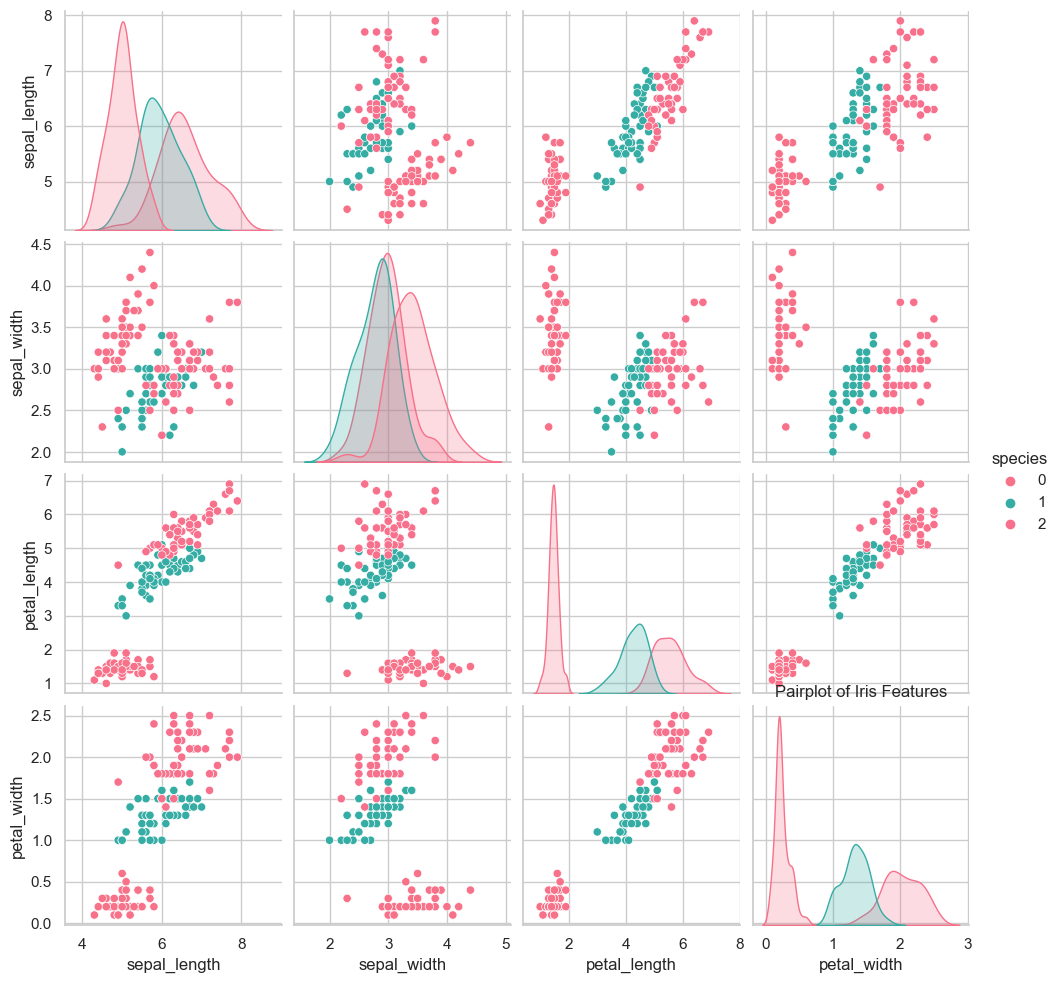

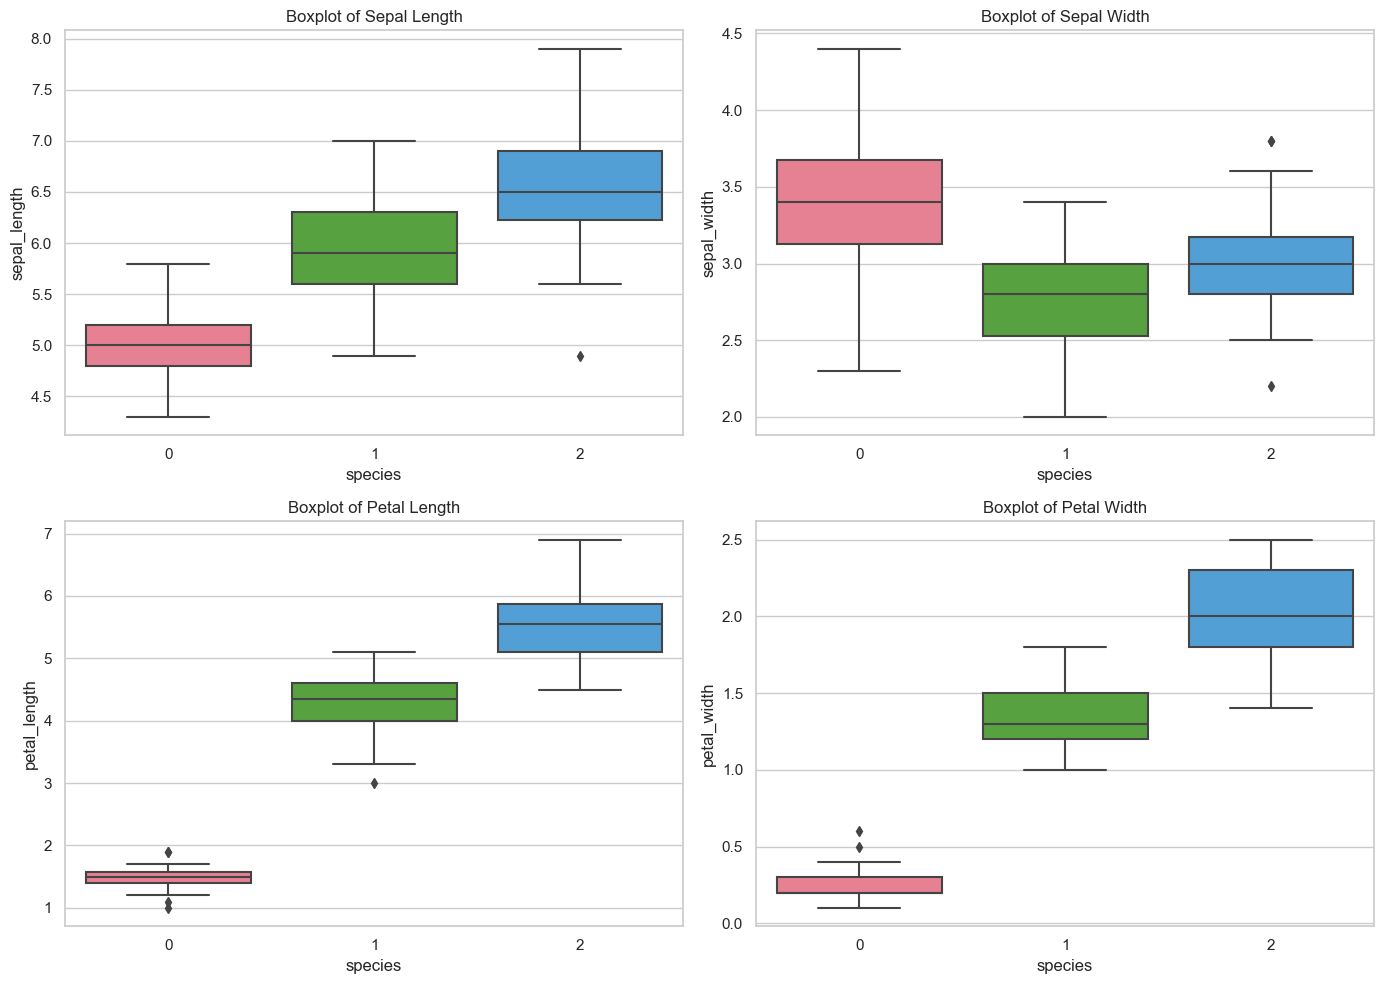

C:\Users\RUSHIKESH\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RUSHIKESH\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RUSHIKESH\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RUSHIKESH\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

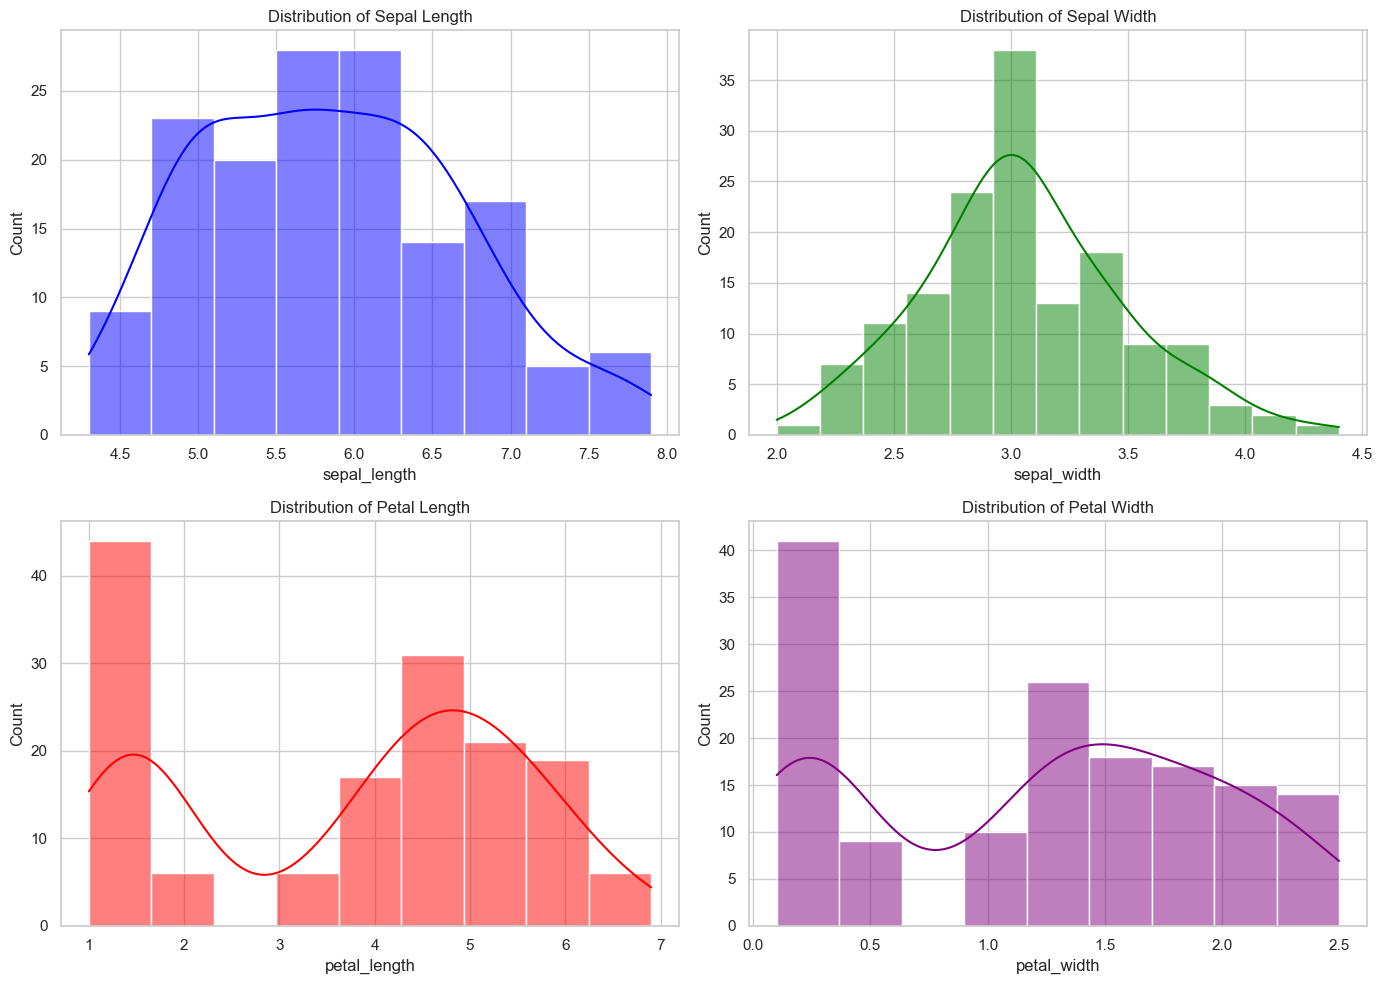

In [77]:
# Set the style of the visualizations
sns.set(style="whitegrid")

# 1. Pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='species', palette='husl')
plt.title('Pairplot of Iris Features')
plt.show()

# 2. Boxplot
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal_length', data=df, palette='husl')
plt.title('Boxplot of Sepal Length')

plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal_width', data=df, palette='husl')
plt.title('Boxplot of Sepal Width')

plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal_length', data=df, palette='husl')
plt.title('Boxplot of Petal Length')

plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal_width', data=df, palette='husl')
plt.title('Boxplot of Petal Width')

plt.tight_layout()
plt.show()

# 3. Distribution Plots
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['sepal_length'], kde=True, color='blue')
plt.title('Distribution of Sepal Length')

plt.subplot(2, 2, 2)
sns.histplot(df['sepal_width'], kde=True, color='green')
plt.title('Distribution of Sepal Width')

plt.subplot(2, 2, 3)
sns.histplot(df['petal_length'], kde=True, color='red')
plt.title('Distribution of Petal Length')

plt.subplot(2, 2, 4)
sns.histplot(df['petal_width'], kde=True, color='purple')
plt.title('Distribution of Petal Width')

plt.tight_layout()
plt.show()


## Data Preprocessing

In [67]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])



## Define Features and Target Variable

In [68]:
# Putting feature variables to X
X = df.drop('species', axis=1)

# Putting response variable to y
y = df['species']


## Split the Data into Training and Testing Sets

In [69]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape



((105, 4), (45, 4))

# Train a Machine Learning Model

In [70]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

# Train the model
classifier_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

#  Evaluate the Model

In [71]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = classifier_rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Classification report
class_report = classification_report(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)



Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


# Make Predictions

In [72]:
# Example prediction
example = [[5.1, 3.5, 1.4, 0.2]]
prediction = classifier_rf.predict(example)
predicted_species = le.inverse_transform(prediction)

print("Predicted species:", predicted_species)


Predicted species: ['Iris-setosa']


C:\Users\RUSHIKESH\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
